<Figure size 1400x1400 with 0 Axes>

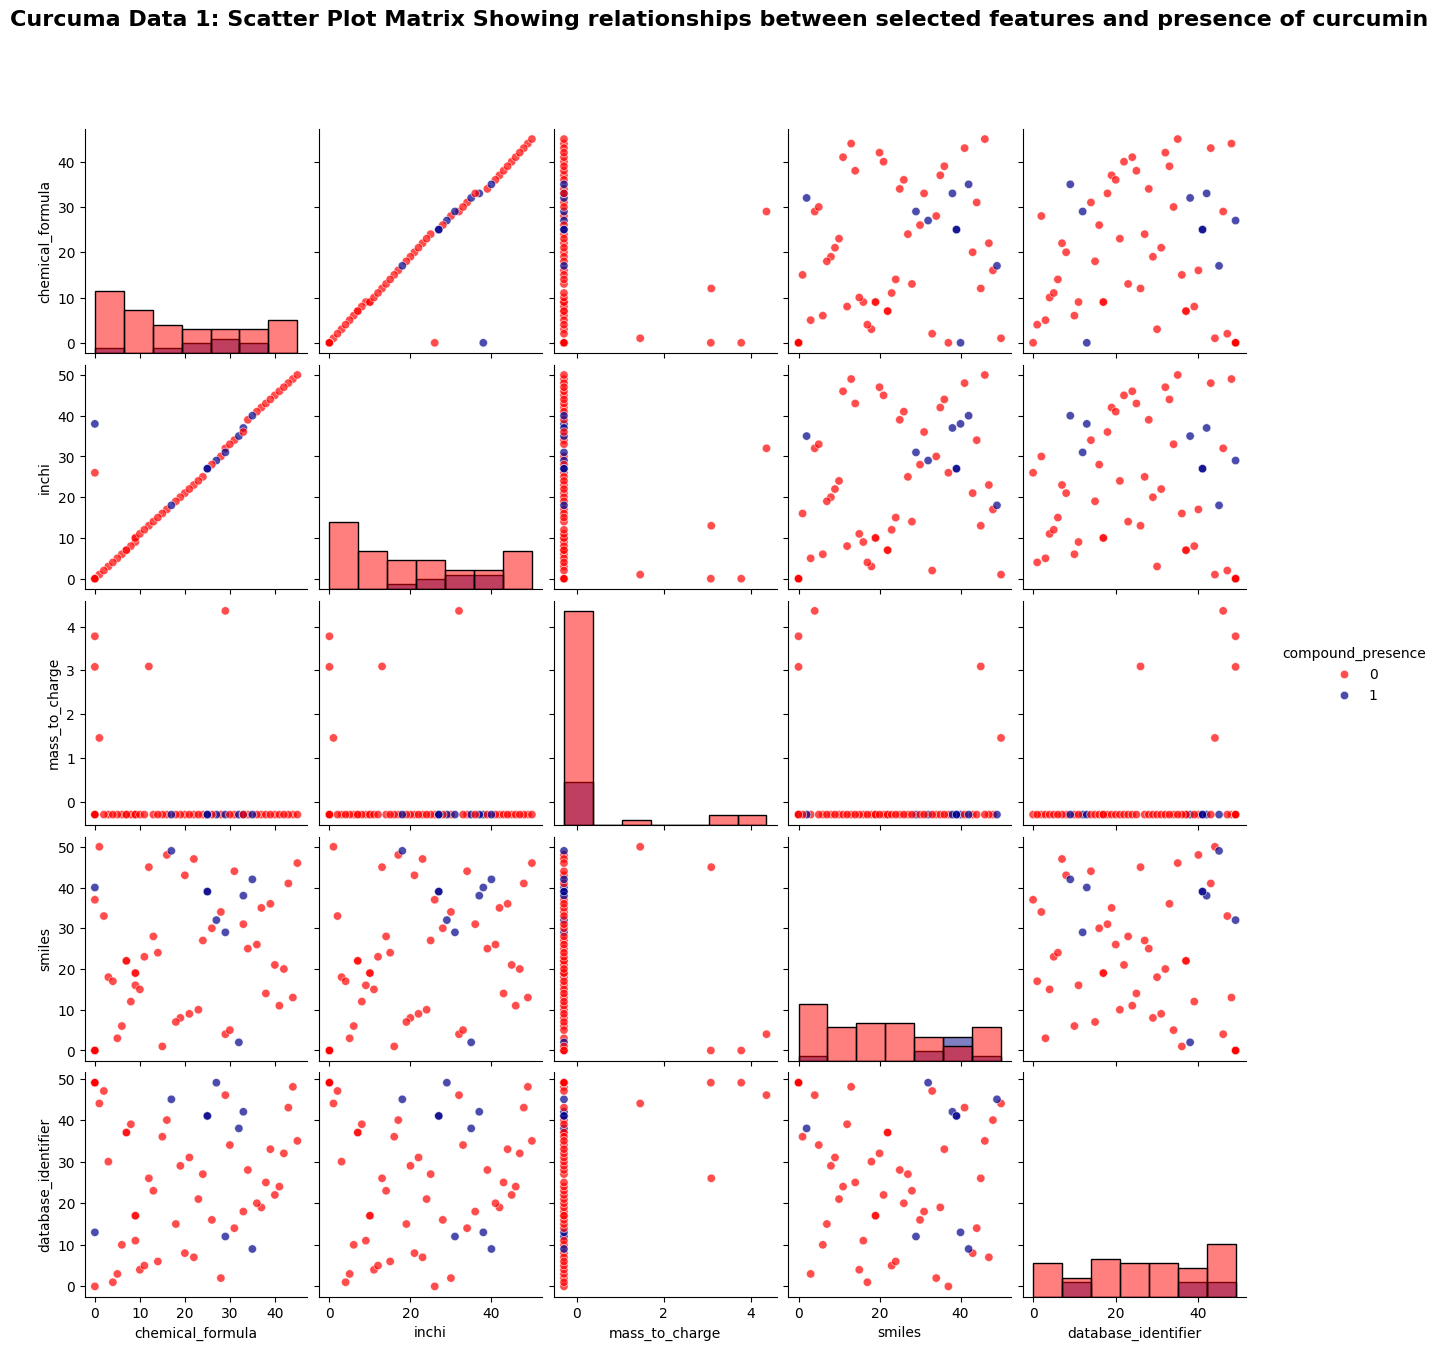

<Figure size 1400x1400 with 0 Axes>

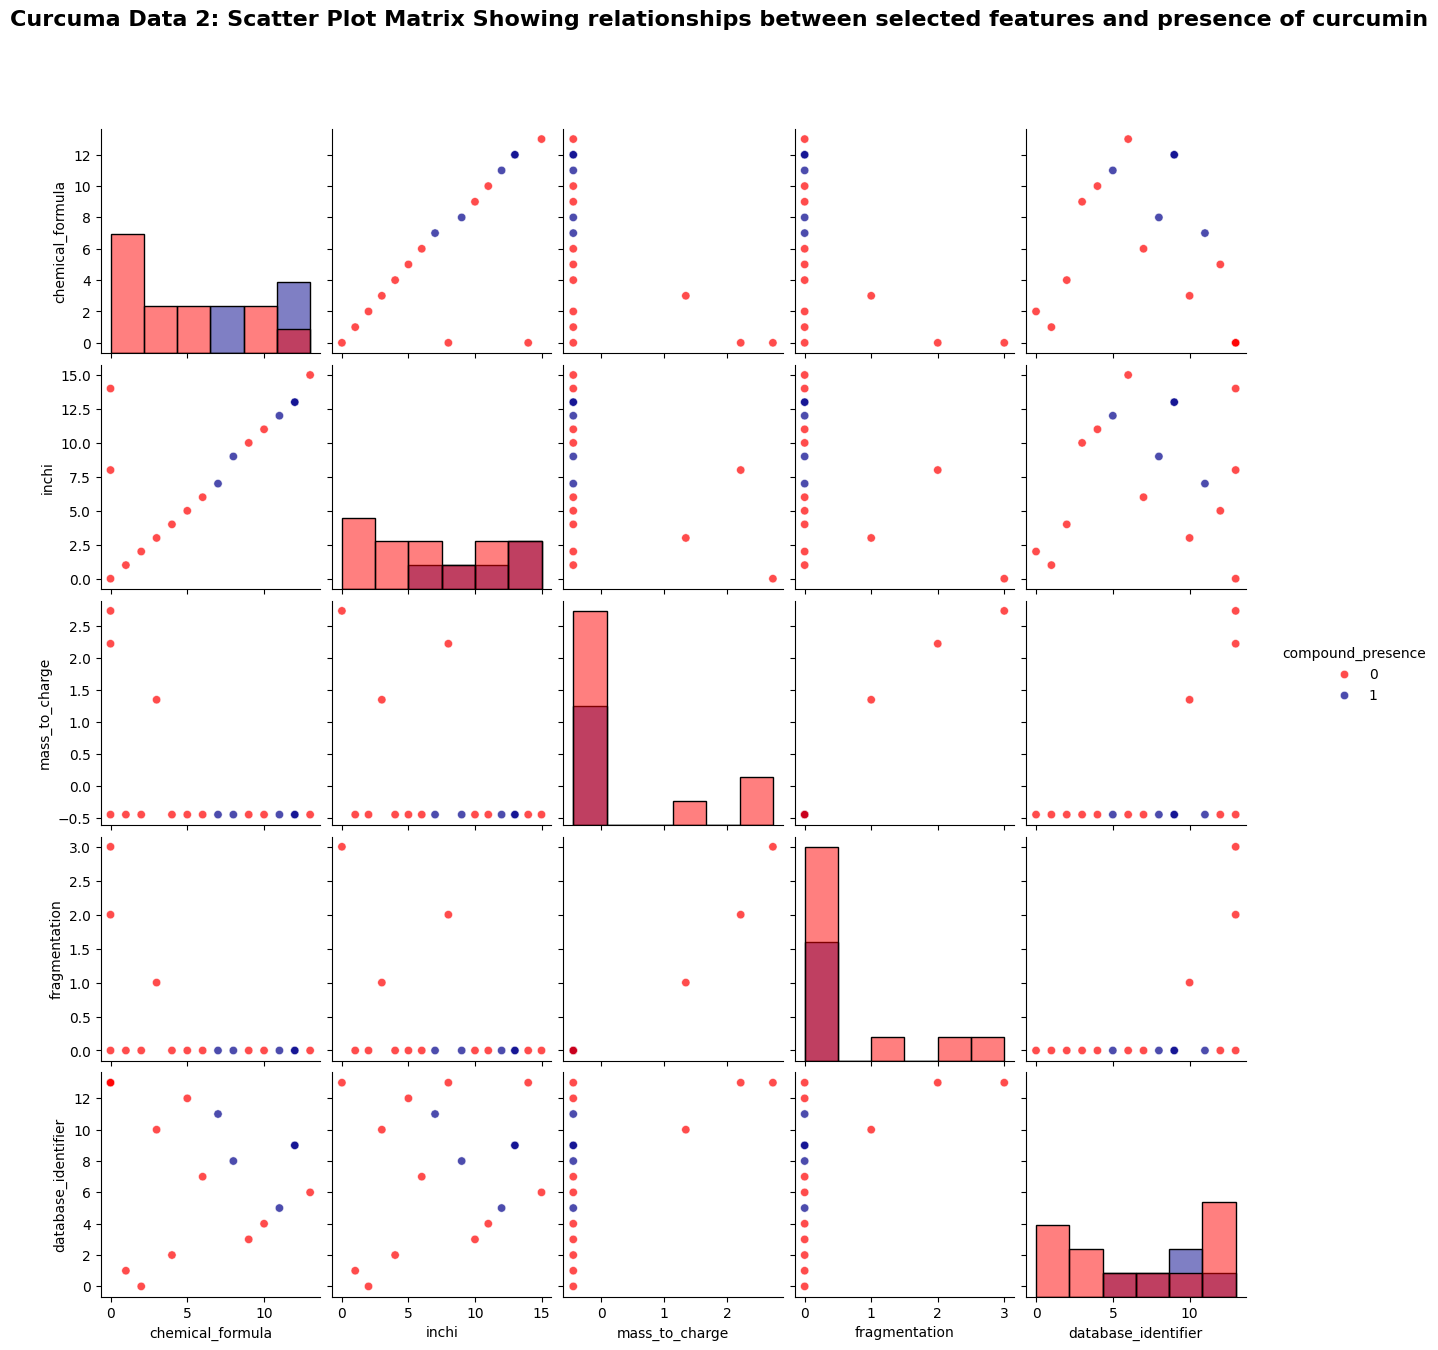

<Figure size 1400x1400 with 0 Axes>

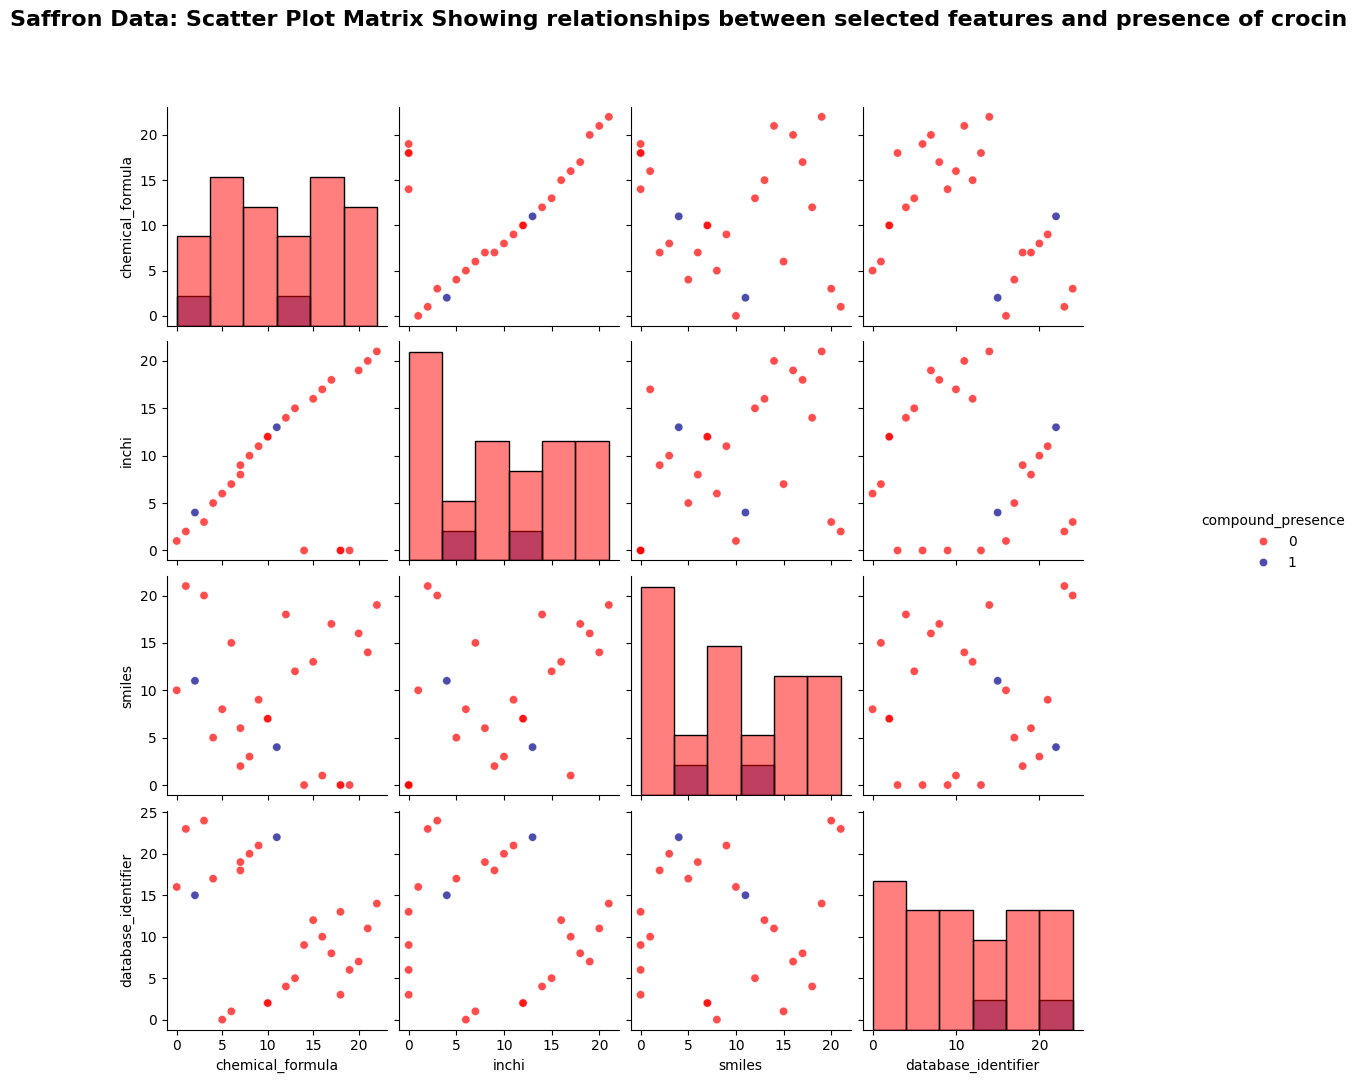

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Loading data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features and target variable
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Function to ensure all entries in a column are strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

# Convert relevant columns to strings
curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features)
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features)
saffron_data_encoded = encode_categorical_features(saffron_data, features)

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Define a function to create a pairplot with custom aesthetics
def custom_pairplot(data, title, hue_column):
    pairplot = sns.pairplot(data, diag_kind="hist", plot_kws={'alpha':0.7}, hue=hue_column, palette=['red', 'darkblue'])
    pairplot.fig.suptitle(title, y=1.08, fontsize=16, fontweight='bold')  # Adjusted spacing and made the title bold
    return pairplot

# Add a function to annotate the meaning of the plot
def annotate_plot(pairplot, text):
    pairplot.fig.text(0.5, 0.01, text, ha='center', fontsize=12, color='gray')

# Create scatter plot matrix (pairplot) for selected features

# Curcuma Data 1
plt.figure(figsize=(14, 14))
pairplot_curcuma1 = custom_pairplot(curcuma_data1_selected.join(curcuma_data1['compound_presence']), 'Curcuma Data 1: Scatter Plot Matrix Showing relationships between selected features and presence of curcumin', hue_column='compound_presence')
plt.show()

# Curcuma Data 2
plt.figure(figsize=(14, 14))
pairplot_curcuma2 = custom_pairplot(curcuma_data2_selected.join(curcuma_data2['compound_presence']), 'Curcuma Data 2: Scatter Plot Matrix Showing relationships between selected features and presence of curcumin', hue_column='compound_presence')
plt.show()

# Saffron Data
plt.figure(figsize=(14, 14))
pairplot_saffron = custom_pairplot(saffron_data_selected.join(saffron_data['compound_presence']), 'Saffron Data: Scatter Plot Matrix Showing relationships between selected features and presence of crocin', hue_column='compound_presence')
plt.show()


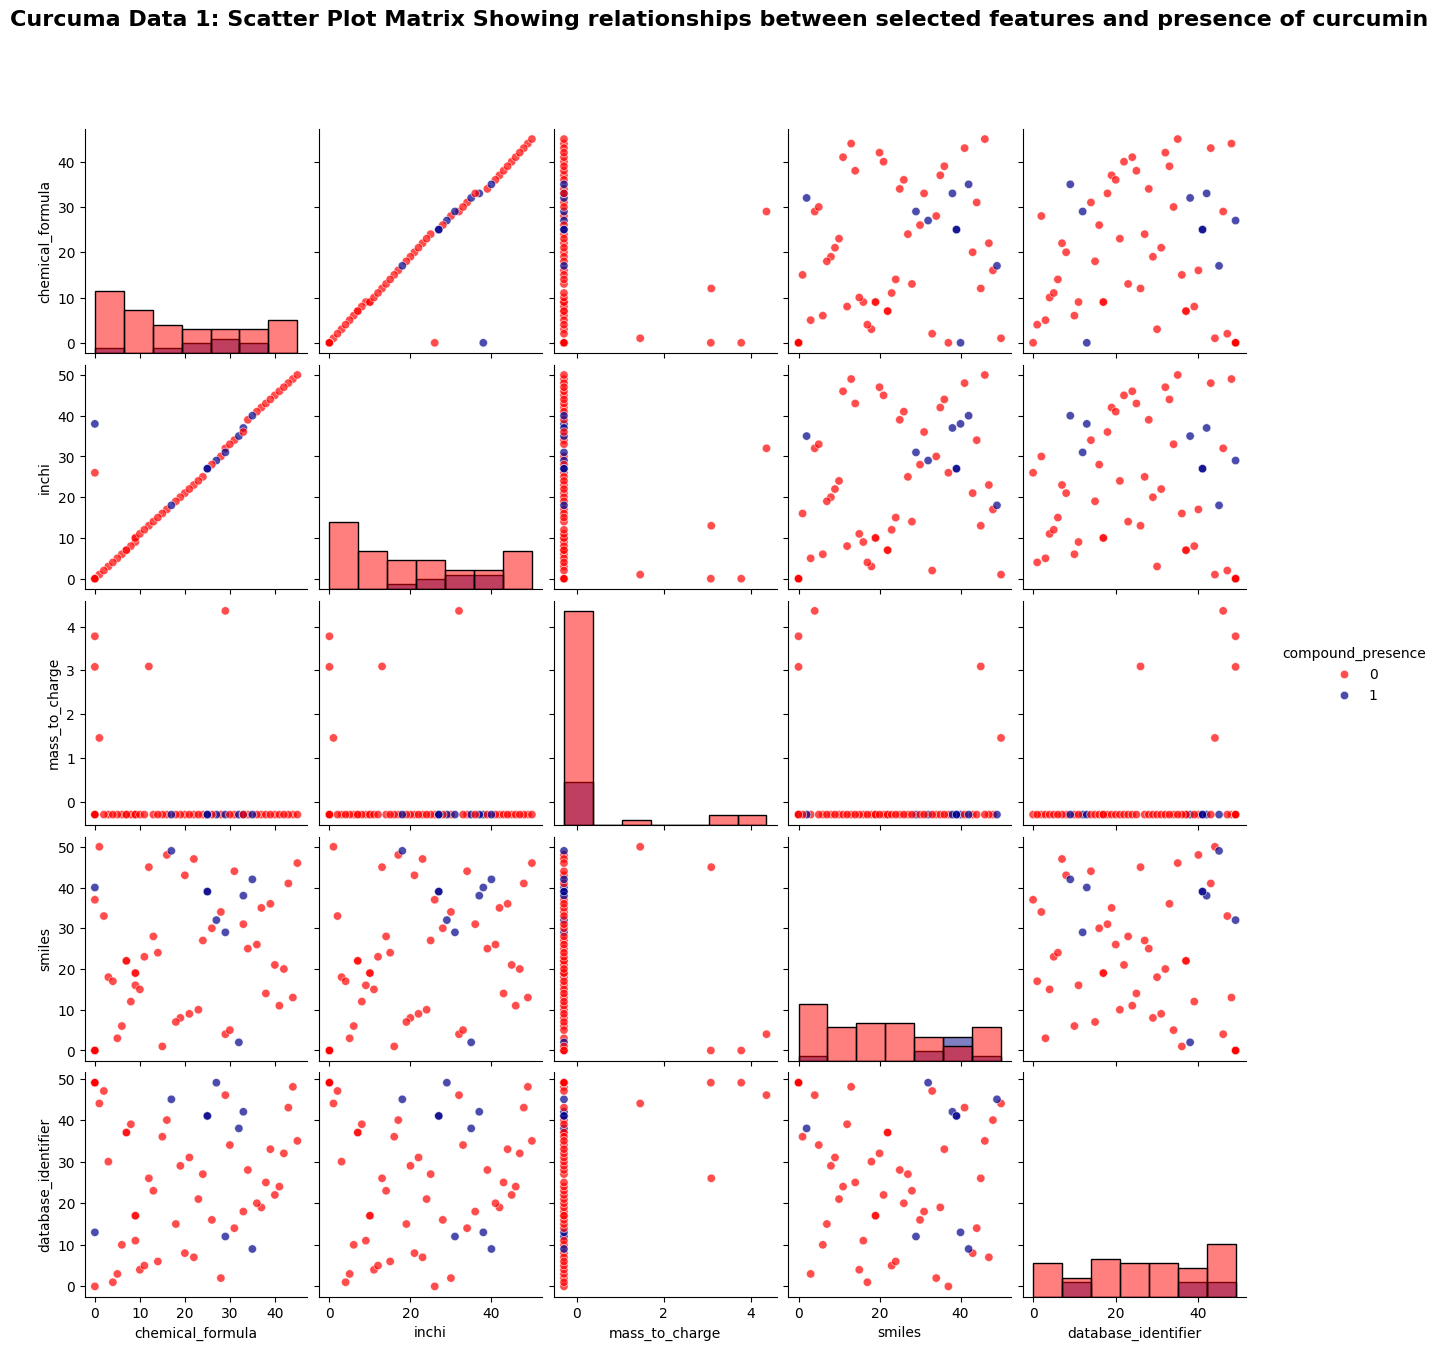

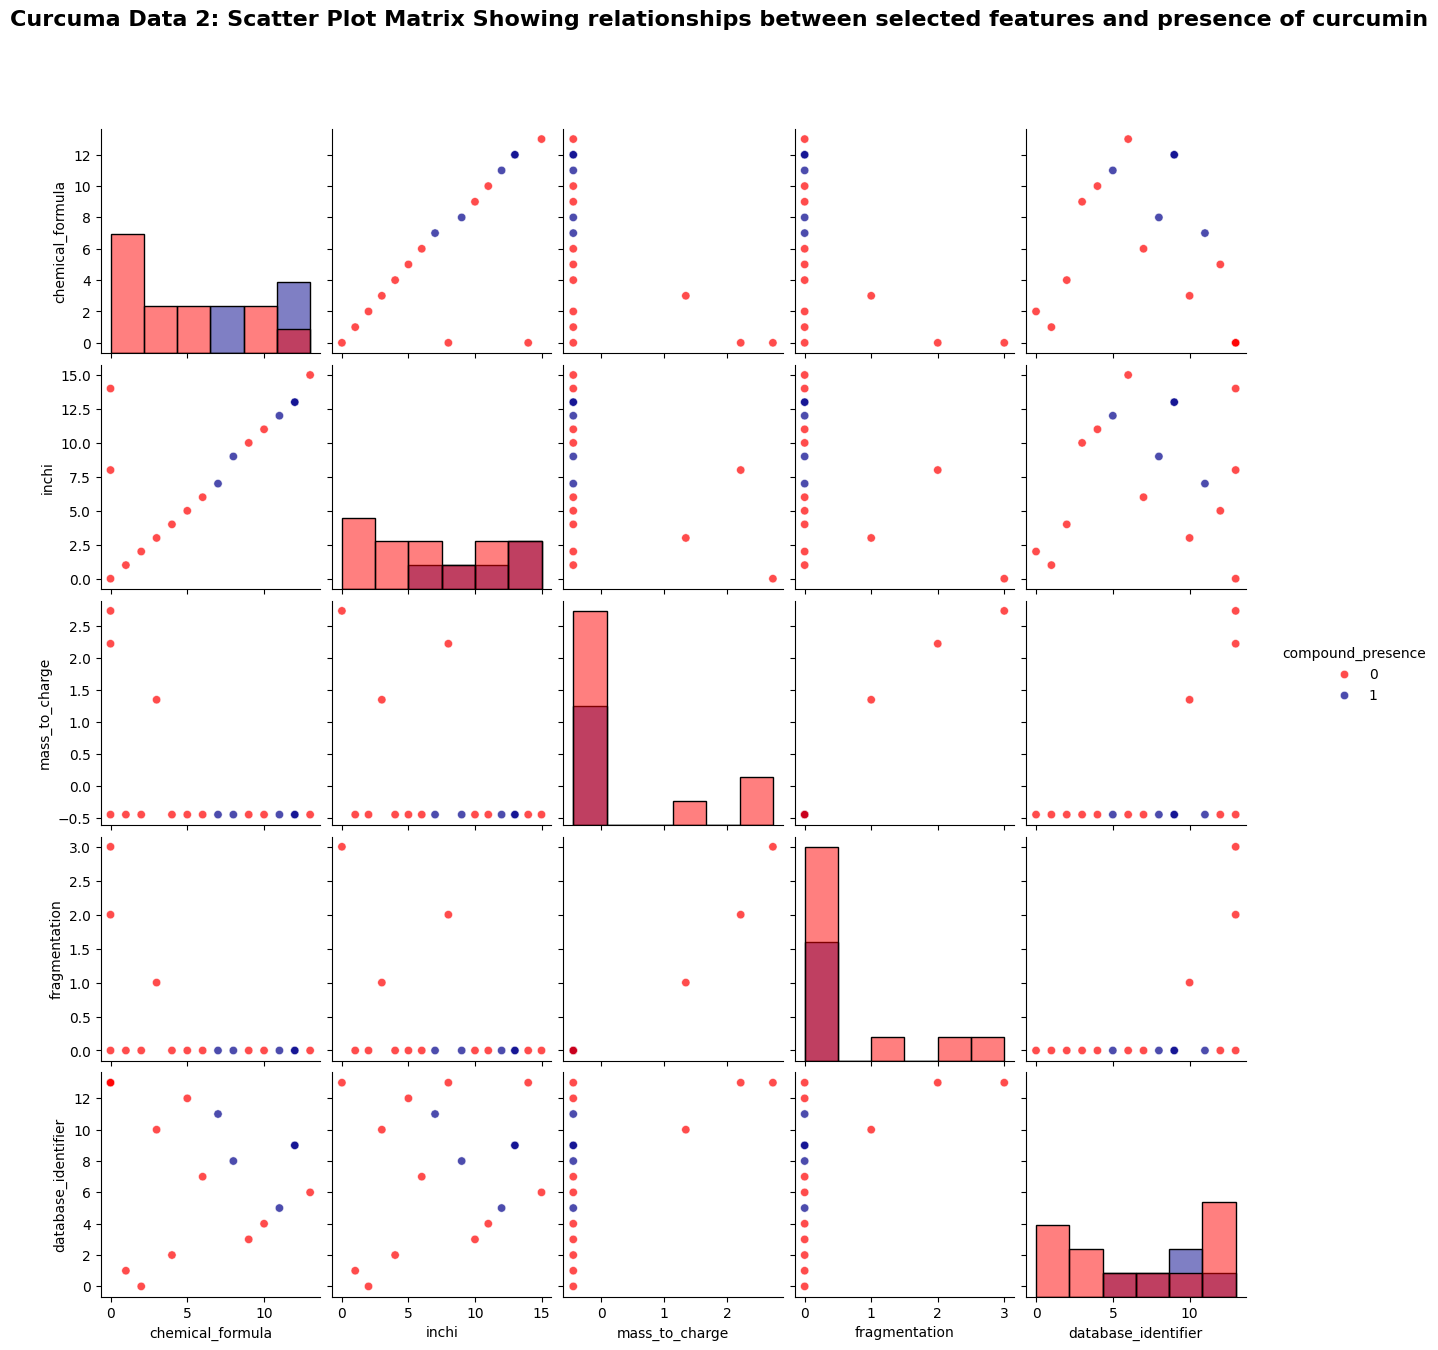

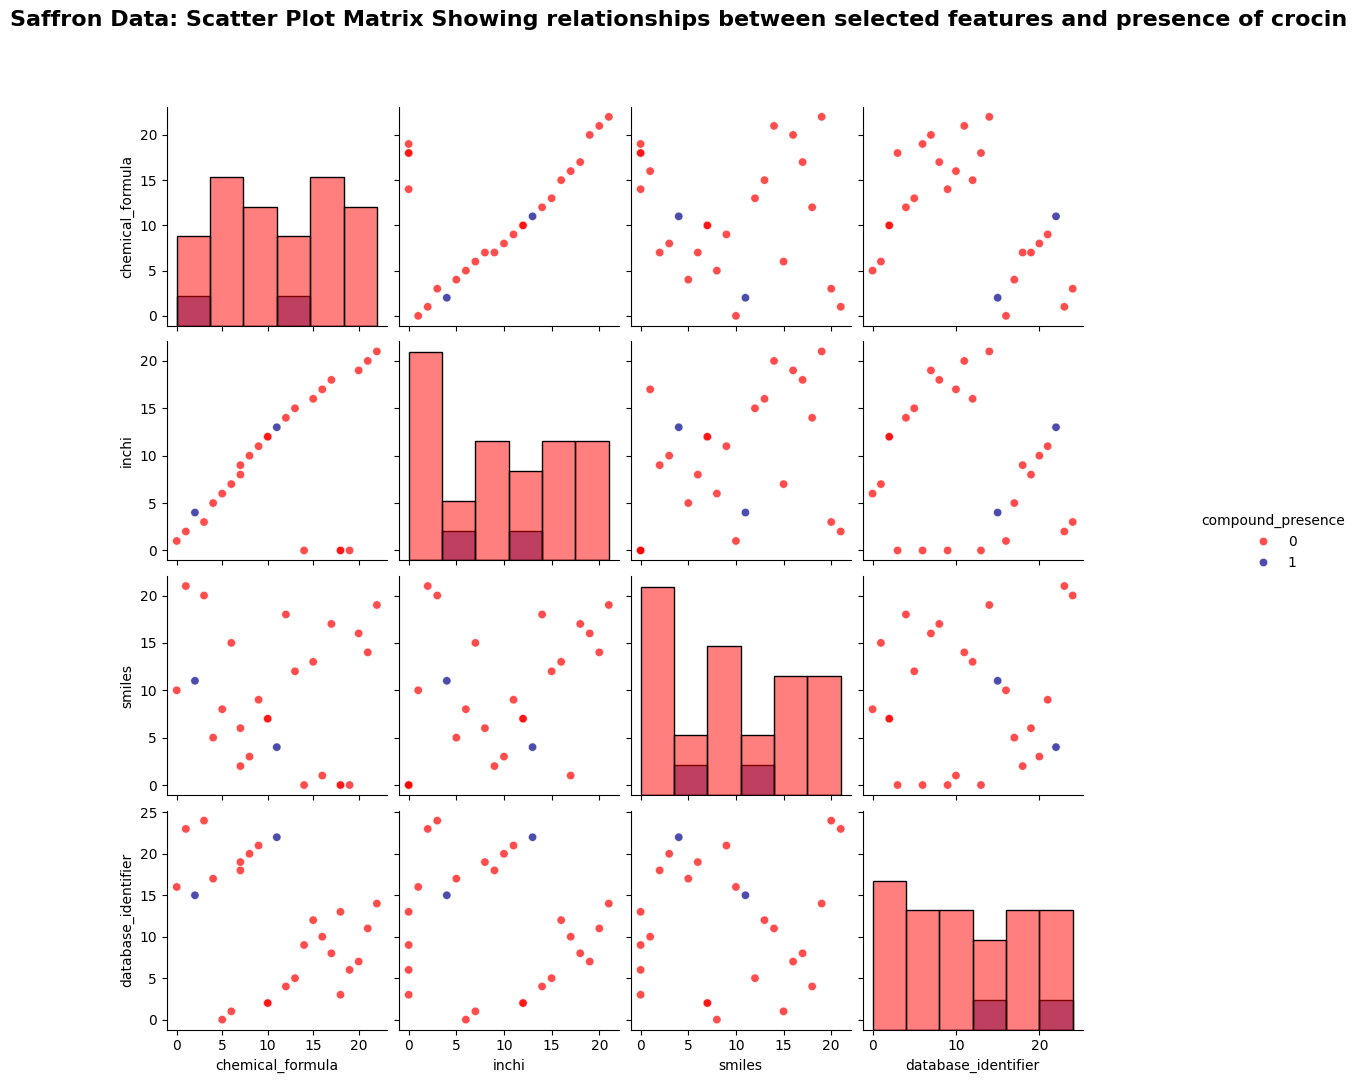

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Loading data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features and target variable
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Function to ensure all entries in a column are strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

# Convert relevant columns to strings
curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features)
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features)
saffron_data_encoded = encode_categorical_features(saffron_data, features)

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Define a function to create a pairplot with custom aesthetics
def custom_pairplot(data, title, hue_column):
    pairplot = sns.pairplot(data, diag_kind="hist", plot_kws={'alpha':0.7}, hue=hue_column, palette=['red', 'darkblue'])
    pairplot.fig.suptitle(title, y=1.08, fontsize=16, fontweight='bold')  # Adjusted spacing and made the title bold
    return pairplot

# Add a function to annotate the meaning of the plot
def annotate_plot(pairplot, text):
    pairplot.fig.text(0.5, 0.01, text, ha='center', fontsize=12, color='gray')

# Create scatter plot matrix (pairplot) for selected features

# Curcuma Data 1
pairplot_curcuma1 = custom_pairplot(curcuma_data1_selected.join(curcuma_data1['compound_presence']), 'Curcuma Data 1: Scatter Plot Matrix Showing relationships between selected features and presence of curcumin', hue_column='compound_presence')
pairplot_curcuma1.savefig('curcuma_data1_scatter_plot.png')

# Curcuma Data 2
pairplot_curcuma2 = custom_pairplot(curcuma_data2_selected.join(curcuma_data2['compound_presence']), 'Curcuma Data 2: Scatter Plot Matrix Showing relationships between selected features and presence of curcumin', hue_column='compound_presence')
pairplot_curcuma2.savefig('curcuma_data2_scatter_plot.png')

# Saffron Data
pairplot_saffron = custom_pairplot(saffron_data_selected.join(saffron_data['compound_presence']), 'Saffron Data: Scatter Plot Matrix Showing relationships between selected features and presence of crocin', hue_column='compound_presence')
pairplot_saffron.savefig('saffron_data_scatter_plot.png')


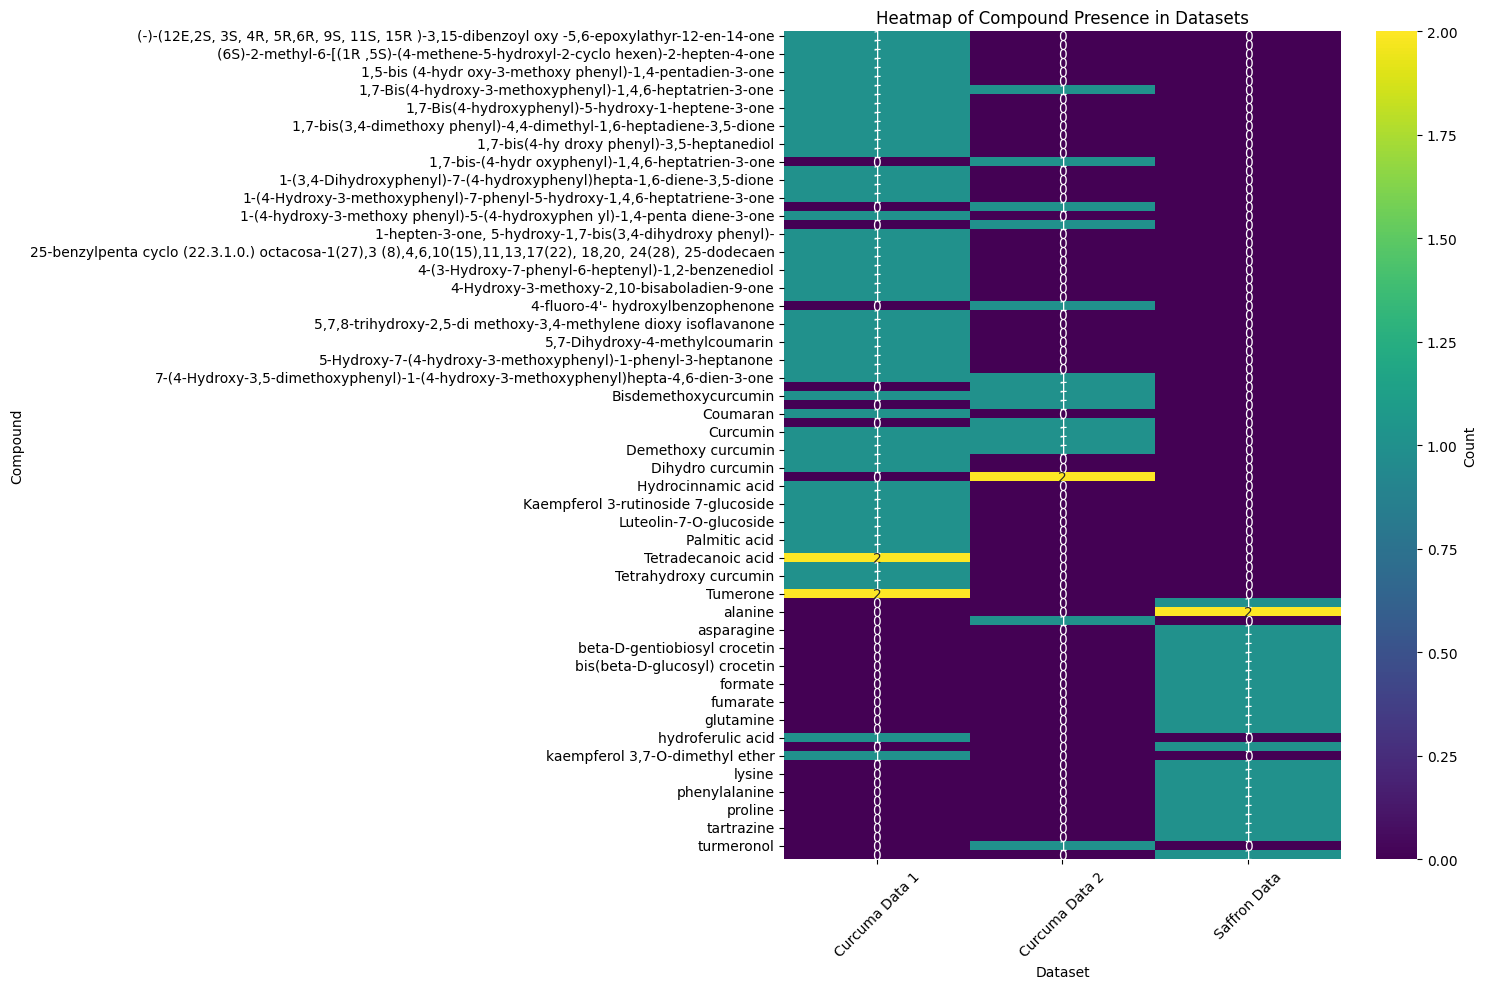

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Pivot the DataFrame for the heatmap
heatmap_data = all_compounds.pivot_table(index='compound', columns='dataset', values='count', fill_value=0)

# Plotting
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Compound Presence in Datasets')
plt.xlabel('Dataset')
plt.ylabel('Compound')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('compound_heatmap.jpg', format='jpeg', dpi=300)
plt.show()


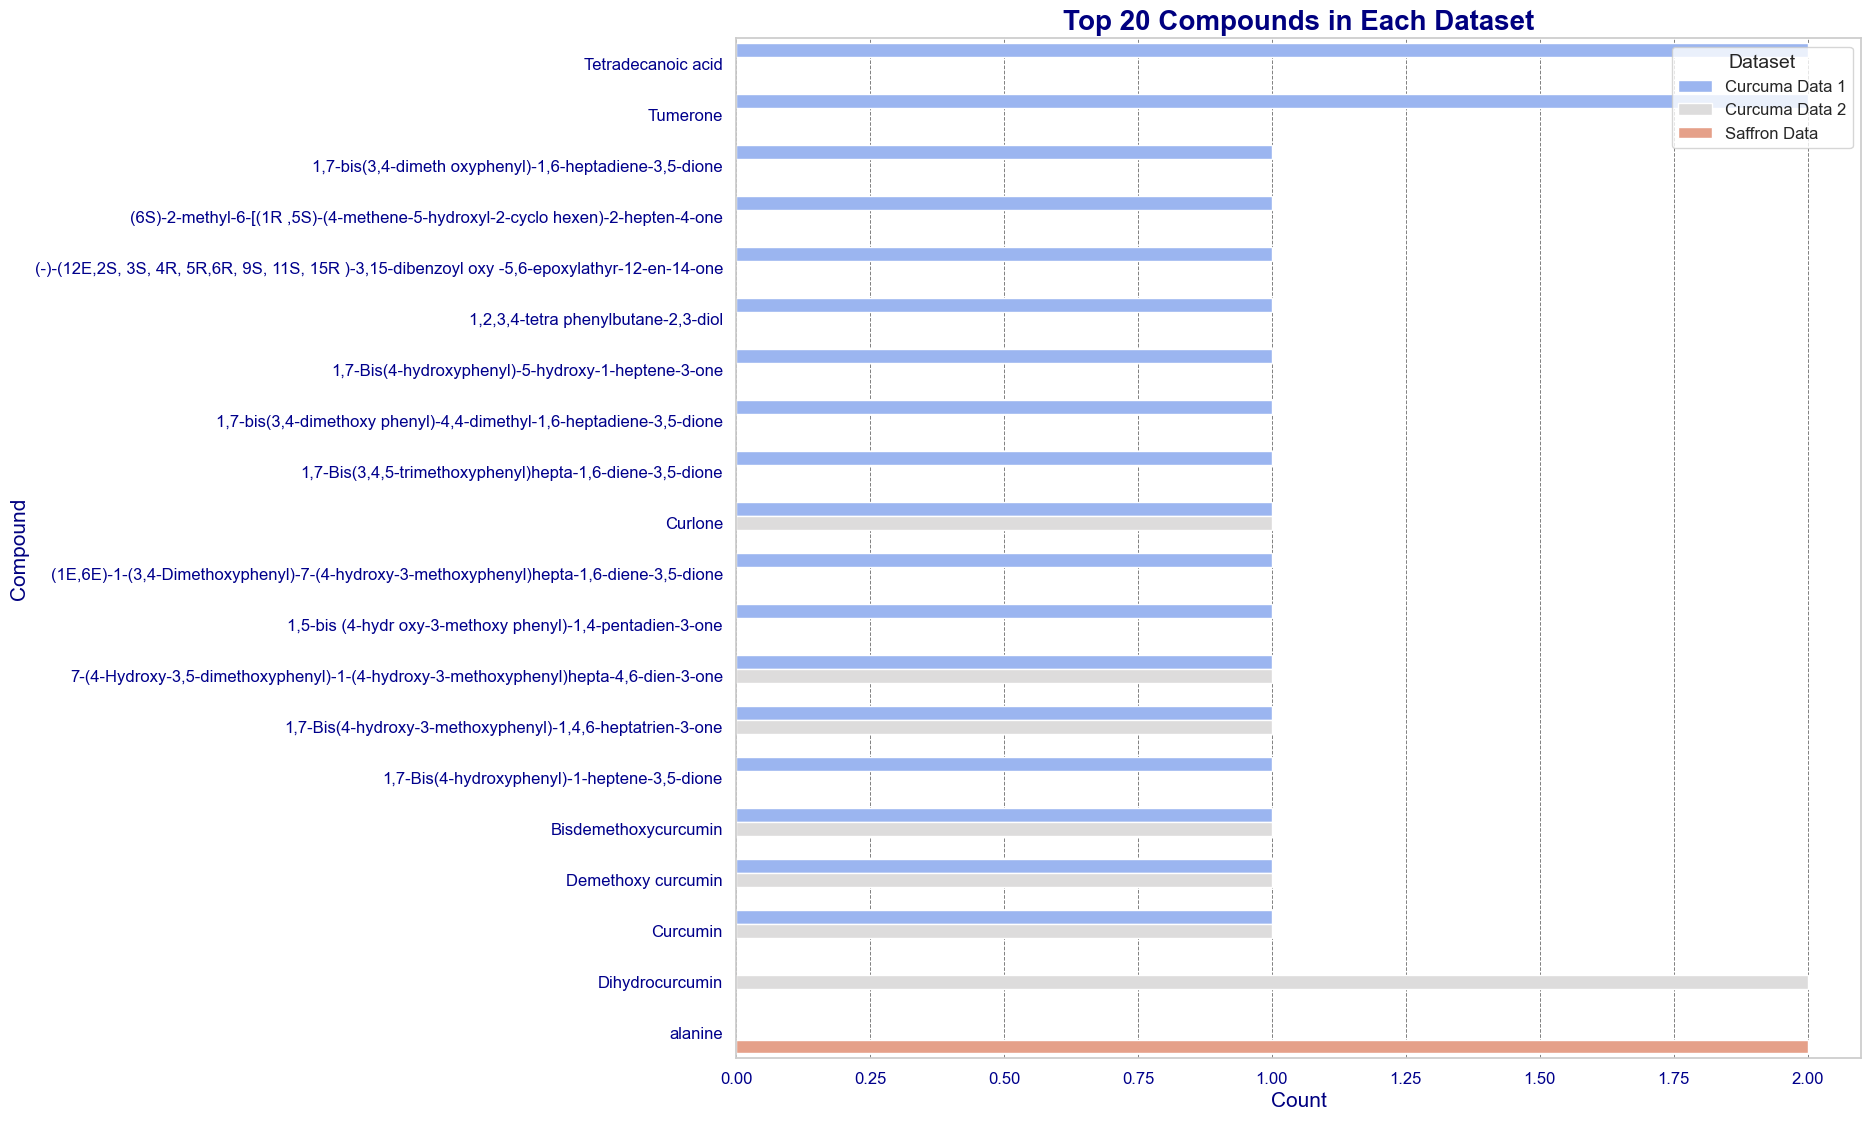

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Select the top N compounds for comparison
top_n = 20
top_compounds = all_compounds.groupby('compound')['count'].sum().nlargest(top_n).index
top_compounds_df = all_compounds[all_compounds['compound'].isin(top_compounds)]

# Plotting
plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")

# Define a custom color palette
custom_palette = sns.color_palette("coolwarm", n_colors=3)

sns.barplot(data=top_compounds_df, x='count', y='compound', hue='dataset', palette=custom_palette)

# Customizing the plot
plt.title('Top 20 Compounds in Each Dataset', fontsize=20, weight='bold', color='navy')
plt.xlabel('Count', fontsize=15, color='navy')
plt.ylabel('Compound', fontsize=15, color='navy')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.legend(title='Dataset', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(axis='x', linestyle='--', linewidth=0.7, color='grey')

# Adjust plot margins
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.1)

# Save the plot as an image file
plt.savefig('top_20_compounds_barplot.png', dpi=300, bbox_inches='tight')
plt.show()


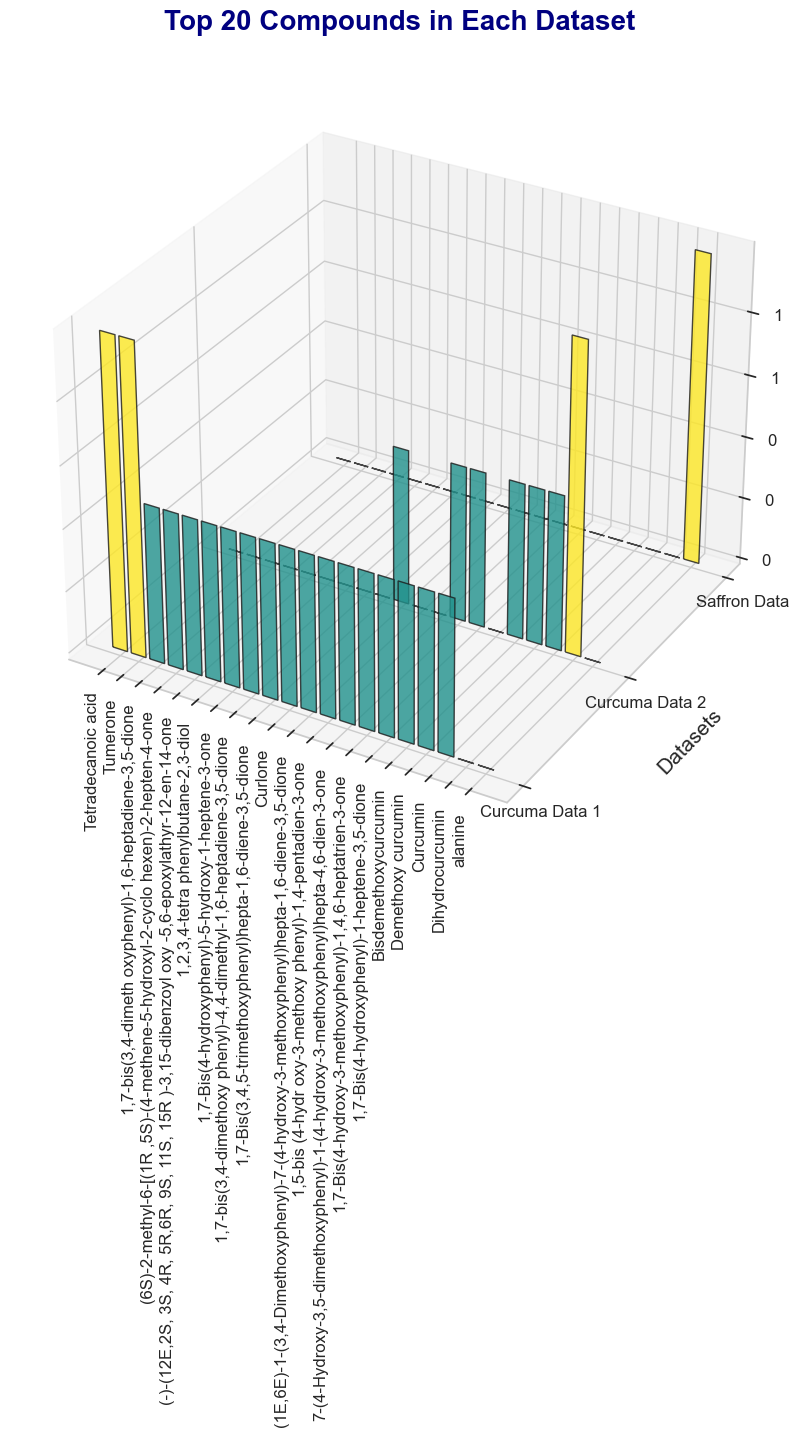

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Select the top N compounds for comparison
top_n = 20
top_compounds = all_compounds.groupby('compound')['count'].sum().nlargest(top_n).index
top_compounds_df = all_compounds[all_compounds['compound'].isin(top_compounds)]

# Prepare data for 3D plot
datasets = top_compounds_df['dataset'].unique()
compounds = top_compounds_df['compound'].unique()

x = np.arange(len(compounds))
y = np.arange(len(datasets))
x, y = np.meshgrid(x, y)

z = np.zeros_like(x, dtype=float)
for i, dataset in enumerate(datasets):
    for j, compound in enumerate(compounds):
        count = top_compounds_df[(top_compounds_df['dataset'] == dataset) & (top_compounds_df['compound'] == compound)]['count'].sum()
        z[i, j] = count

# Plotting
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Customize color map
colors = plt.cm.viridis(z / float(z.max()))

for i in range(len(datasets)):
    ax.bar(x[i], z[i], zs=y[i], zdir='y', color=colors[i], alpha=0.8, edgecolor='k')


ax.set_ylabel('Datasets', fontsize=15, labelpad=20)
ax.set_zlabel('Count', fontsize=15, labelpad=20)
ax.set_title('Top 20 Compounds in Each Dataset', fontsize=20, weight='bold', color='navy', pad=30)

ax.set_xticks(x[0])
ax.set_xticklabels(compounds, rotation=90, fontsize=12)
ax.set_yticks(y[:, 0])
ax.set_yticklabels(datasets, fontsize=12)
ax.set_zticks(np.arange(0, z.max(), step=z.max()/5))
ax.set_zticklabels([f'{int(i)}' for i in np.arange(0, z.max(), step=z.max()/5)], fontsize=12)

# Adjust plot margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.25)

# Save the plot as an image file
plt.savefig('top_20_compounds_3d_barplot.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\Muqaddas Bano\AppData\Local\Temp\ipykernel_8120\3543598414.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1500x1200 with 0 Axes>

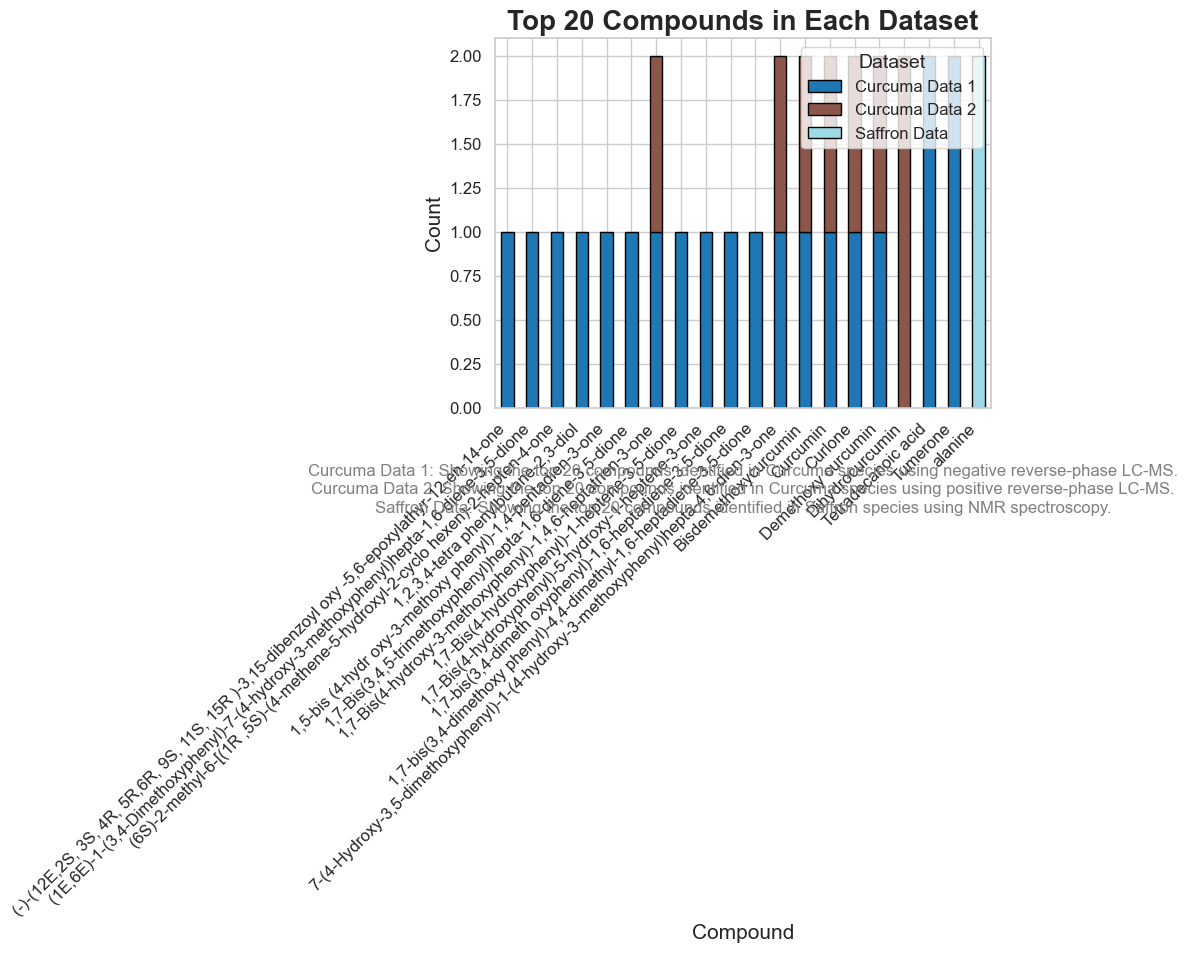

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Select the top N compounds for comparison
top_n = 20
top_compounds = all_compounds.groupby('compound')['count'].sum().nlargest(top_n).index
top_compounds_df = all_compounds[all_compounds['compound'].isin(top_compounds)]

# Pivot the data for a stacked bar chart
pivot_df = top_compounds_df.pivot(index='compound', columns='dataset', values='count').fillna(0)

# Plotting
plt.figure(figsize=(15, 12))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')

# Customizing the plot
plt.title('Top 20 Compounds in Each Dataset', fontsize=20, weight='bold')
plt.xlabel('Compound', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Dataset', fontsize=12, title_fontsize=14, loc='upper right')

# Annotate the meaning of the plot
annotations = [
    "Curcuma Data 1: Showing the top 20 compounds identified in Curcuma species using negative reverse-phase LC-MS.",
    "Curcuma Data 2: Showing the top 20 compounds identified in Curcuma species using positive reverse-phase LC-MS.",
    "Saffron Data: Showing the top 20 compounds identified in Saffron species using NMR spectroscopy."
]
for i, annotation in enumerate(annotations):
    plt.text(0.5, -0.15 - i * 0.05, annotation, ha='center', va='top', transform=plt.gca().transAxes, fontsize=12, color='gray')

# Save the plot as an image file
plt.tight_layout()
plt.savefig('top_20_compounds_stacked_bar.png', dpi=300)
plt.show()


C:\Users\Muqaddas Bano\AppData\Local\Temp\ipykernel_8120\1803395073.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


<Figure size 1500x1000 with 0 Axes>

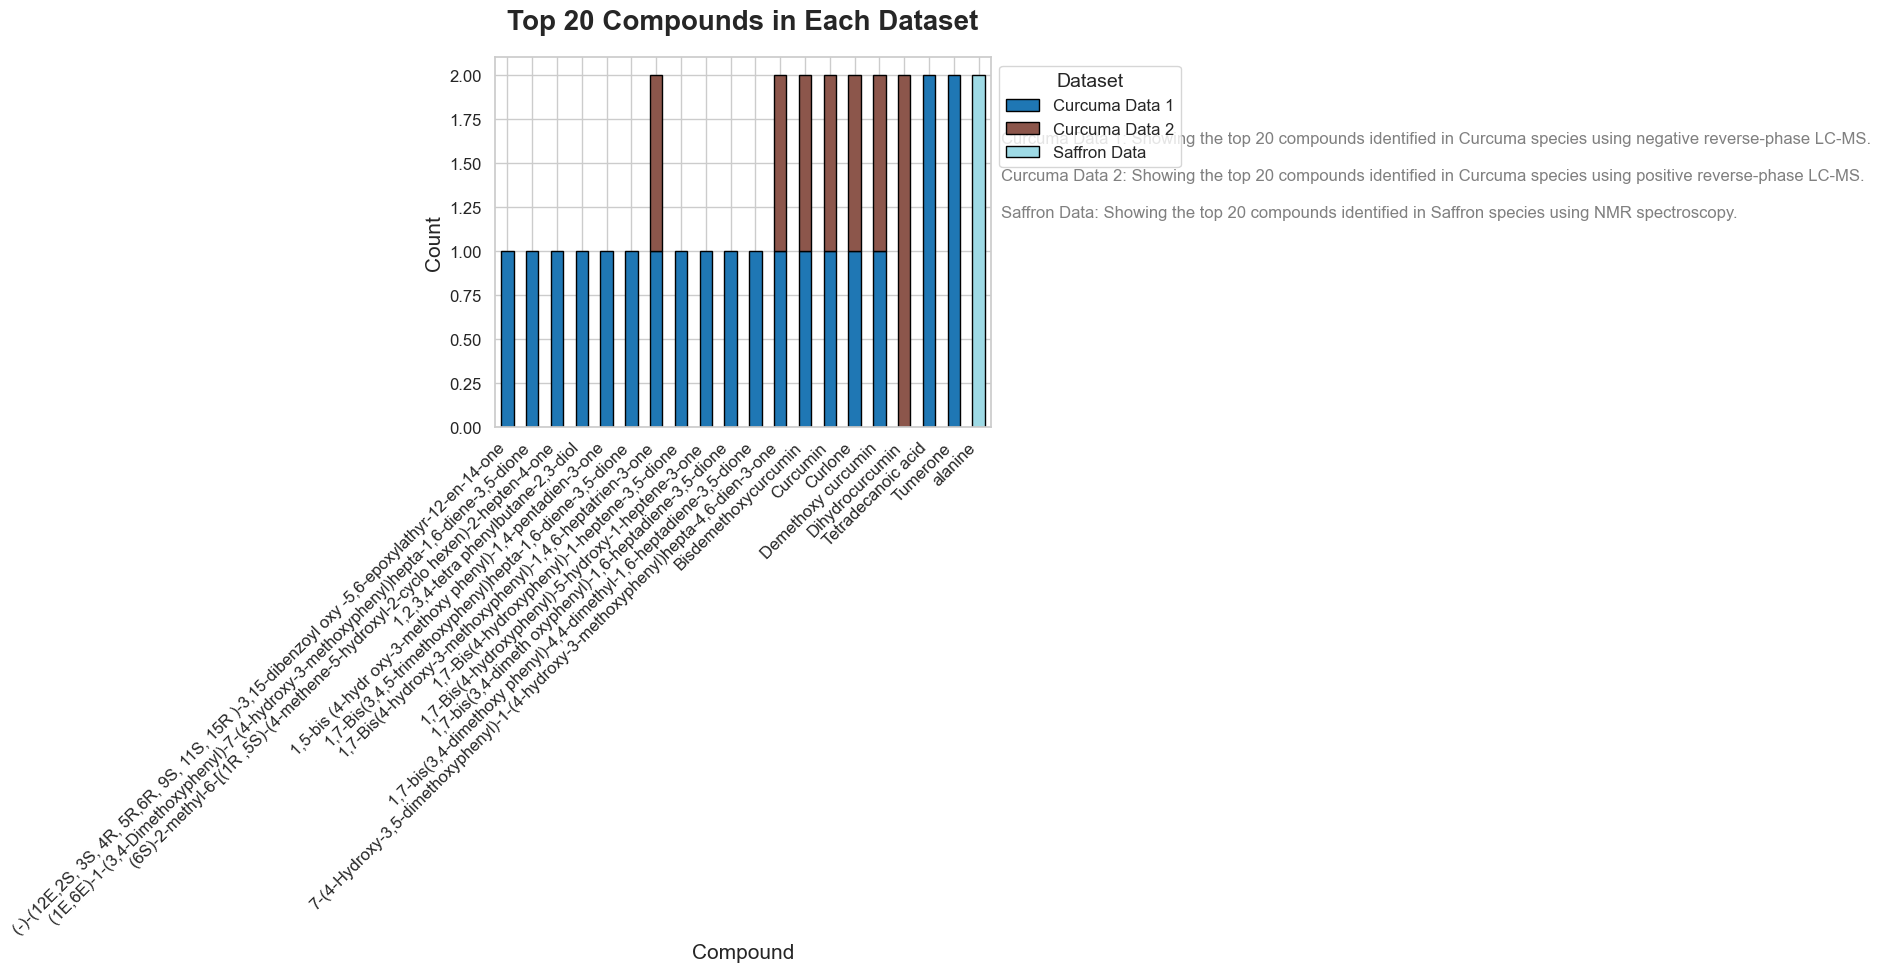

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Select the top N compounds for comparison
top_n = 20
top_compounds = all_compounds.groupby('compound')['count'].sum().nlargest(top_n).index
top_compounds_df = all_compounds[all_compounds['compound'].isin(top_compounds)]

# Pivot the data for a stacked bar chart
pivot_df = top_compounds_df.pivot(index='compound', columns='dataset', values='count').fillna(0)

# Plotting
plt.figure(figsize=(15, 10))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')

# Customizing the plot
plt.title('Top 20 Compounds in Each Dataset', fontsize=20, weight='bold', pad=20)
plt.xlabel('Compound', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Dataset', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Annotate the meaning of the plot
annotations = [
    "Curcuma Data 1: Showing the top 20 compounds identified in Curcuma species using negative reverse-phase LC-MS.",
    "Curcuma Data 2: Showing the top 20 compounds identified in Curcuma species using positive reverse-phase LC-MS.",
    "Saffron Data: Showing the top 20 compounds identified in Saffron species using NMR spectroscopy."
]
for i, annotation in enumerate(annotations):
    plt.text(1.02, 0.8 - i * 0.1, annotation, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='gray')

# Save the plot as an image file
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('top_20_compounds_stacked_bar.png', dpi=300)
plt.show()


ValueError: array([[0.993248, 0.906157, 0.143936, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ]]) is not a valid value for color

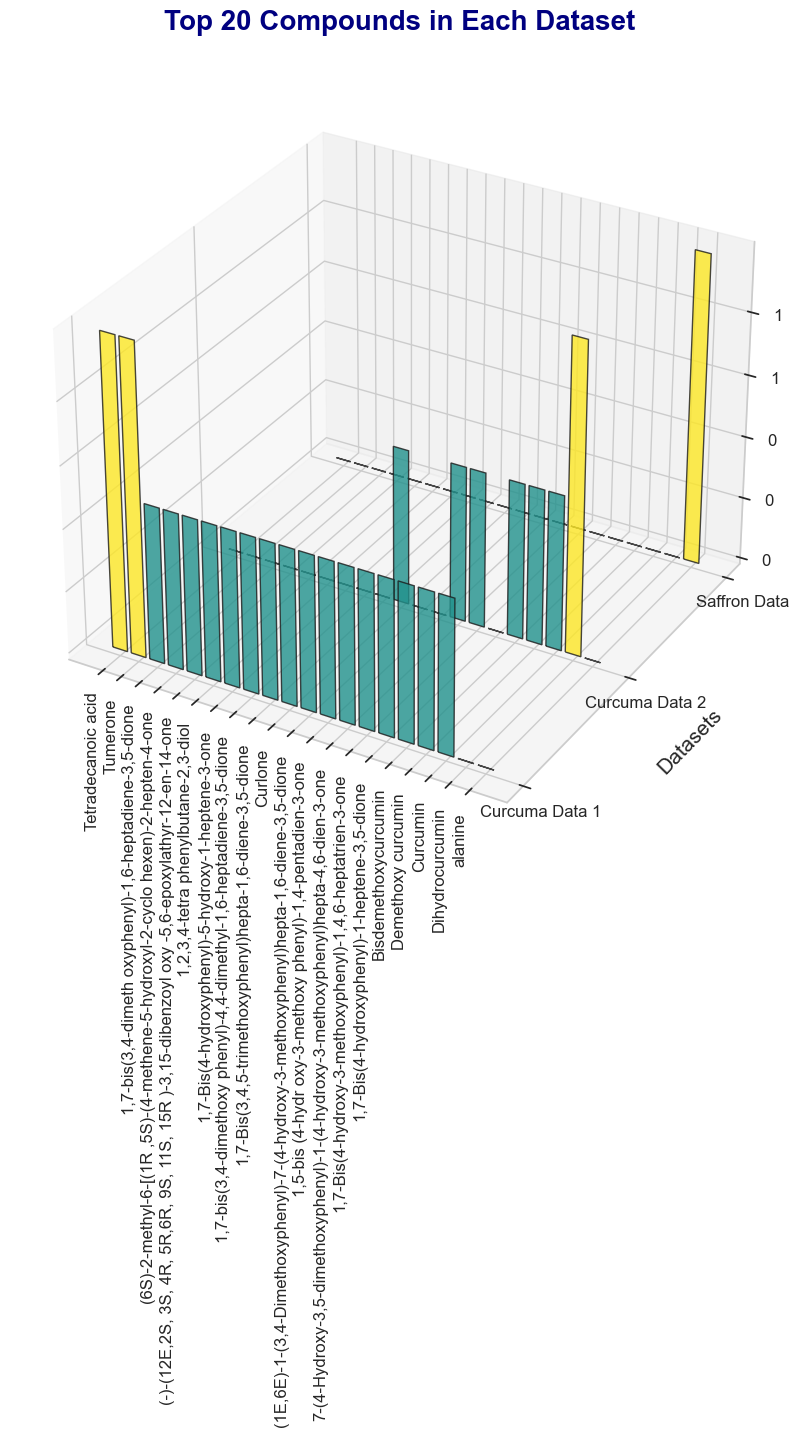

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Select the top N compounds for comparison
top_n = 20
top_compounds = all_compounds.groupby('compound')['count'].sum().nlargest(top_n).index
top_compounds_df = all_compounds[all_compounds['compound'].isin(top_compounds)]

# Prepare data for 3D plot
datasets = top_compounds_df['dataset'].unique()
compounds = top_compounds_df['compound'].unique()

x = np.arange(len(compounds))
y = np.arange(len(datasets))
x, y = np.meshgrid(x, y)

z = np.zeros_like(x, dtype=float)
for i, dataset in enumerate(datasets):
    for j, compound in enumerate(compounds):
        count = top_compounds_df[(top_compounds_df['dataset'] == dataset) & (top_compounds_df['compound'] == compound)]['count'].sum()
        z[i, j] = count

# Plotting
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Customize color map
colors = plt.cm.viridis(z / float(z.max()))

for i in range(len(datasets)):
    ax.bar(x[i], z[i], zs=y[i], zdir='y', color=colors[i], alpha=0.8, edgecolor='k')

ax.set_ylabel('Datasets', fontsize=15, labelpad=20)
ax.set_zlabel('Count', fontsize=15, labelpad=20)
ax.set_title('Top 20 Compounds in Each Dataset', fontsize=20, weight='bold', color='navy', pad=30)

ax.set_xticks(x[0])
ax.set_xticklabels(compounds, rotation=90, fontsize=12)
ax.set_yticks(y[:, 0])
ax.set_yticklabels(datasets, fontsize=12)
ax.set_zticks(np.arange(0, z.max(), step=z.max()/5))
ax.set_zticklabels([f'{int(i)}' for i in np.arange(0, z.max(), step=z.max()/5)], fontsize=12)

# Adjust plot margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.25)

# Custom legend
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(datasets))]
labels = [f'{dataset}' for dataset in datasets]
legend = plt.legend(handles, labels, title='Datasets', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot as an image file
plt.savefig('top_20_compounds_3d_barplot.png', dpi=300, bbox_inches='tight')
plt.show()


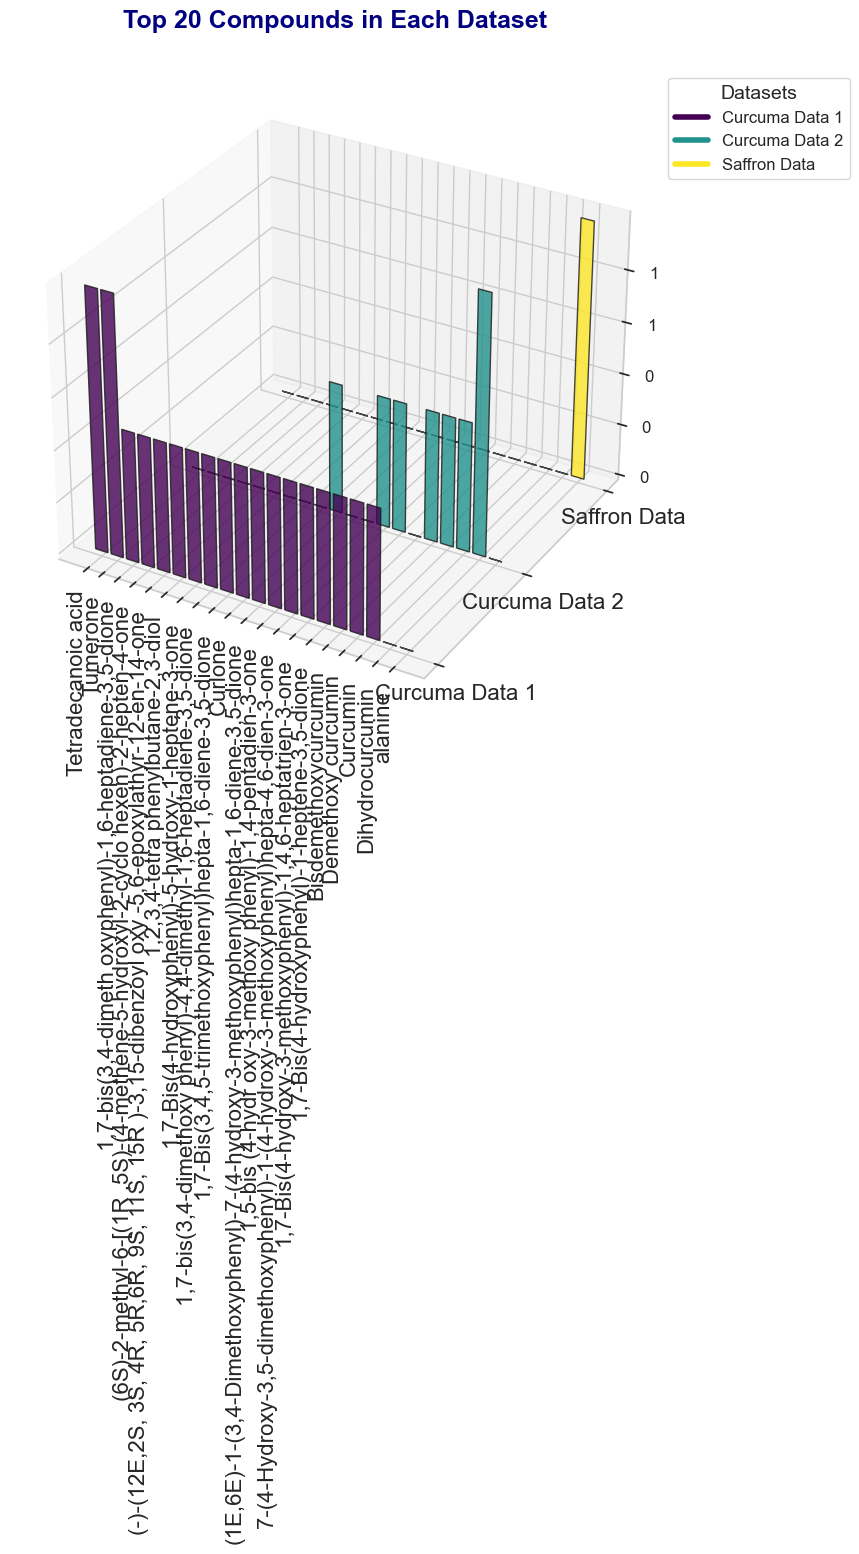

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Select the top N compounds for comparison
top_n = 20
top_compounds = all_compounds.groupby('compound')['count'].sum().nlargest(top_n).index
top_compounds_df = all_compounds[all_compounds['compound'].isin(top_compounds)]

# Prepare data for 3D plot
datasets = top_compounds_df['dataset'].unique()
compounds = top_compounds_df['compound'].unique()

x = np.arange(len(compounds))
y = np.arange(len(datasets))
x, y = np.meshgrid(x, y)

z = np.zeros_like(x, dtype=float)
for i, dataset in enumerate(datasets):
    for j, compound in enumerate(compounds):
        count = top_compounds_df[(top_compounds_df['dataset'] == dataset) & (top_compounds_df['compound'] == compound)]['count'].sum()
        z[i, j] = count

# Plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Customize color map
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

for i in range(len(datasets)):
    ax.bar(x[i], z[i], zs=y[i], zdir='y', color=colors[i], alpha=0.8, edgecolor='k')


ax.set_title('Top 20 Compounds in Each Dataset', fontsize=18, weight='bold', color='navy', pad=30)

ax.set_xticks(x[0])
ax.set_xticklabels(compounds, rotation=90, fontsize=16)
ax.set_yticks(y[:, 0])
ax.set_yticklabels(datasets, fontsize=16)
ax.set_zticks(np.arange(0, z.max(), step=z.max()/5))
ax.set_zticklabels([f'{int(i)}' for i in np.arange(0, z.max(), step=z.max()/5)], fontsize=12)

# Adjust plot margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.25)

# Custom legend
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(datasets))]
labels = [f'{dataset}' for dataset in datasets]
legend = plt.legend(handles, labels, title='Datasets', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot as an image file
plt.savefig('top_20_compounds_3d_barplot.png', dpi=300, bbox_inches='tight')
plt.show()


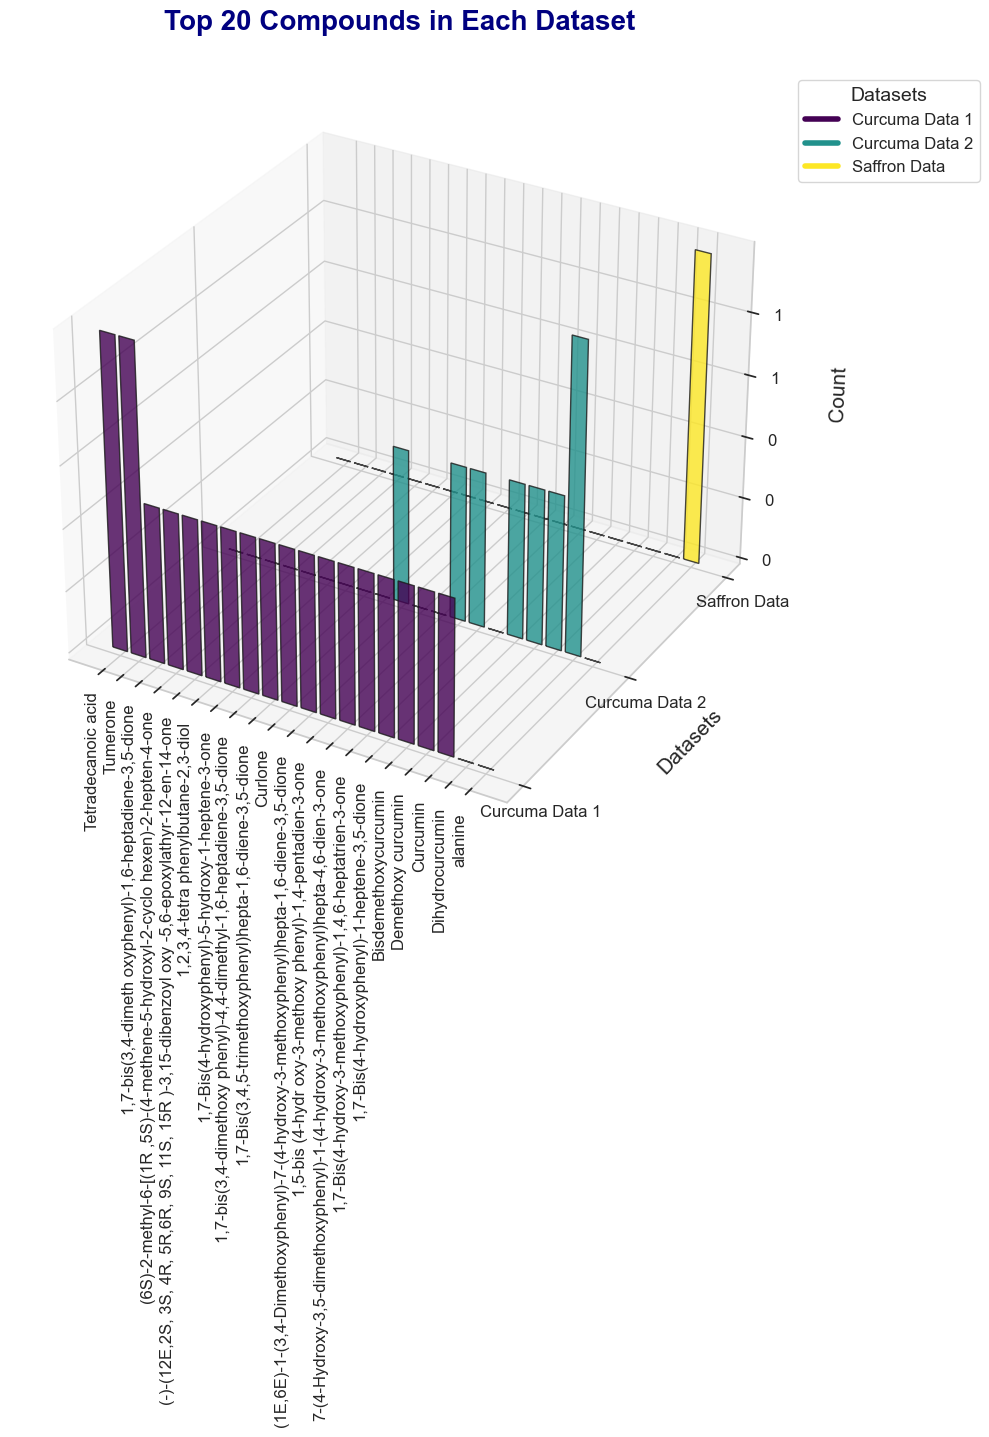

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Select the top N compounds for comparison
top_n = 20
top_compounds = all_compounds.groupby('compound')['count'].sum().nlargest(top_n).index
top_compounds_df = all_compounds[all_compounds['compound'].isin(top_compounds)]

# Prepare data for 3D plot
datasets = top_compounds_df['dataset'].unique()
compounds = top_compounds_df['compound'].unique()

x = np.arange(len(compounds))
y = np.arange(len(datasets))
x, y = np.meshgrid(x, y)

z = np.zeros_like(x, dtype=float)
for i, dataset in enumerate(datasets):
    for j, compound in enumerate(compounds):
        count = top_compounds_df[(top_compounds_df['dataset'] == dataset) & (top_compounds_df['compound'] == compound)]['count'].sum()
        z[i, j] = count

# Plotting
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Customize color map
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

for i in range(len(datasets)):
    ax.bar(x[i], z[i], zs=y[i], zdir='y', color=colors[i], alpha=0.8, edgecolor='k')

ax.set_ylabel('Datasets', fontsize=15, labelpad=20)
ax.set_zlabel('Count', fontsize=15, labelpad=20)
ax.set_title('Top 20 Compounds in Each Dataset', fontsize=20, weight='bold', color='navy', pad=30)

ax.set_xticks(x[0])
ax.set_xticklabels(compounds, rotation=90, fontsize=12)
ax.set_yticks(y[:, 0])
ax.set_yticklabels(datasets, fontsize=12)
ax.set_zticks(np.arange(0, z.max(), step=z.max()/5))
ax.set_zticklabels([f'{int(i)}' for i in np.arange(0, z.max(), step=z.max()/5)], fontsize=12)

# Adjust plot margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.25)

# Custom legend
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(datasets))]
labels = [f'{dataset}' for dataset in datasets]
legend = plt.legend(handles, labels, title='Datasets', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot as an image file
plt.savefig('top_20_compounds_3d_barplot.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\Muqaddas Bano\AppData\Local\Temp\ipykernel_8120\2559670446.py:28: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=all_compounds, x='dataset', y='count', hue='compound', palette=['green', 'purple'])


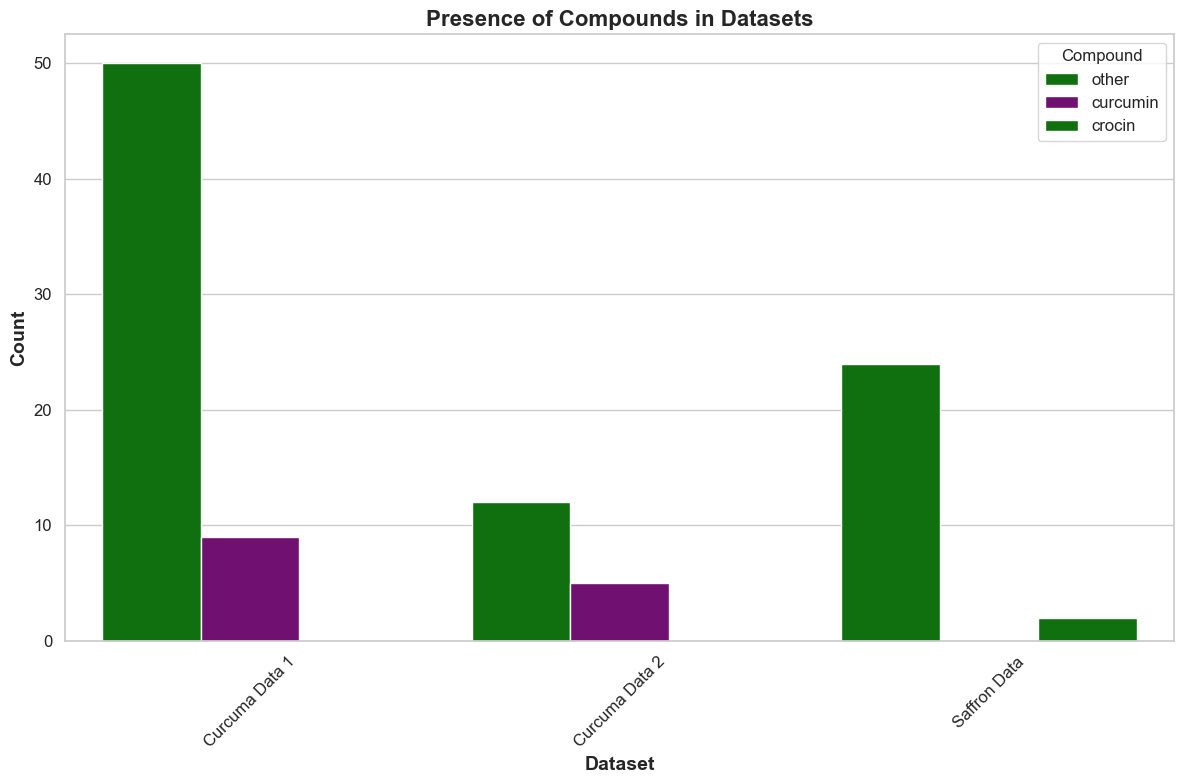

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, compound_name, dataset_name):
    data['compound_presence'] = data['metabolite_identification'].apply(lambda x: compound_name if compound_name in str(x).lower() else 'other')
    compound_counts = data['compound_presence'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'curcumin', 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'curcumin', 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'crocin', 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=all_compounds, x='dataset', y='count', hue='compound', palette=['green', 'purple'])
plt.title('Presence of Compounds in Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Compound', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('compound_presence_datasets.jpg', format='jpeg', dpi=300)
plt.show()


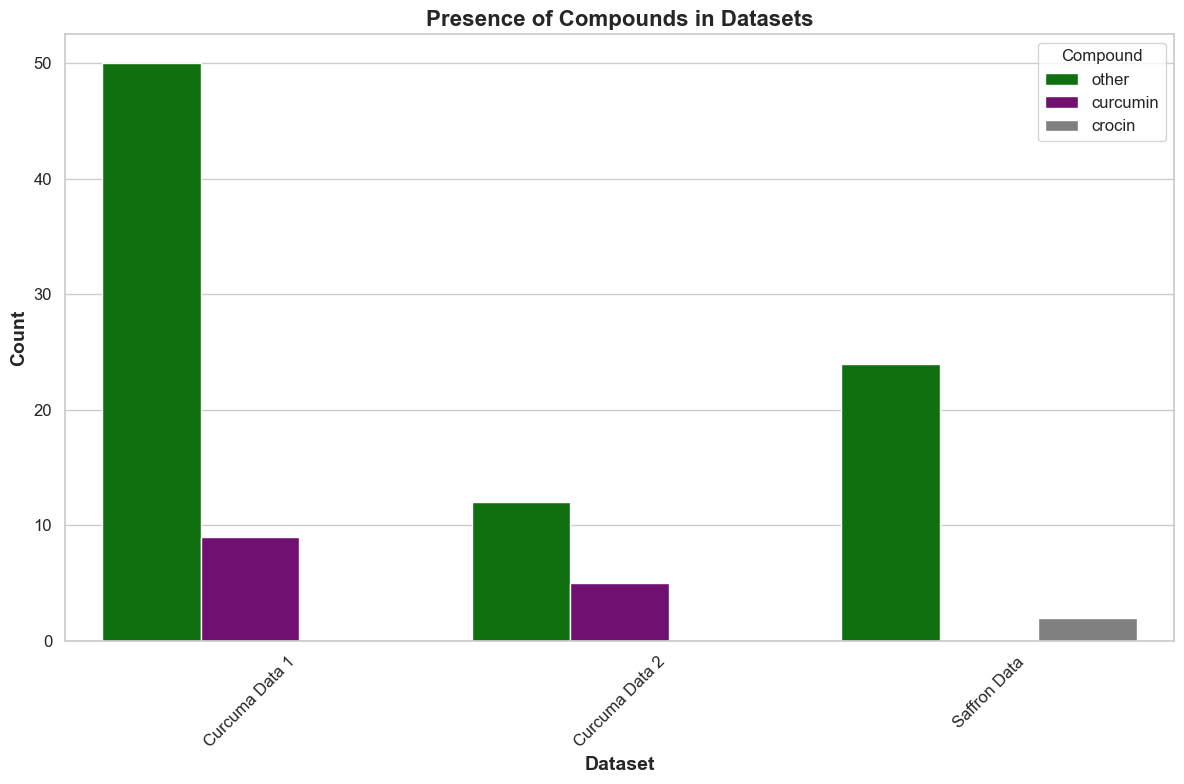

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, compound_name, dataset_name):
    data['compound_presence'] = data['metabolite_identification'].apply(lambda x: compound_name if compound_name in str(x).lower() else 'other')
    compound_counts = data['compound_presence'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'curcumin', 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'curcumin', 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'crocin', 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Define a custom color palette with enough colors
custom_palette = ['green', 'purple', 'grey']

# Plotting
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Set the style to whitegrid for better readability
sns.barplot(data=all_compounds, x='dataset', y='count', hue='compound', palette=custom_palette)
plt.title('Presence of Compounds in Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Compound', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('compound_presence_datasets.jpg', format='jpeg', dpi=300)
plt.show()


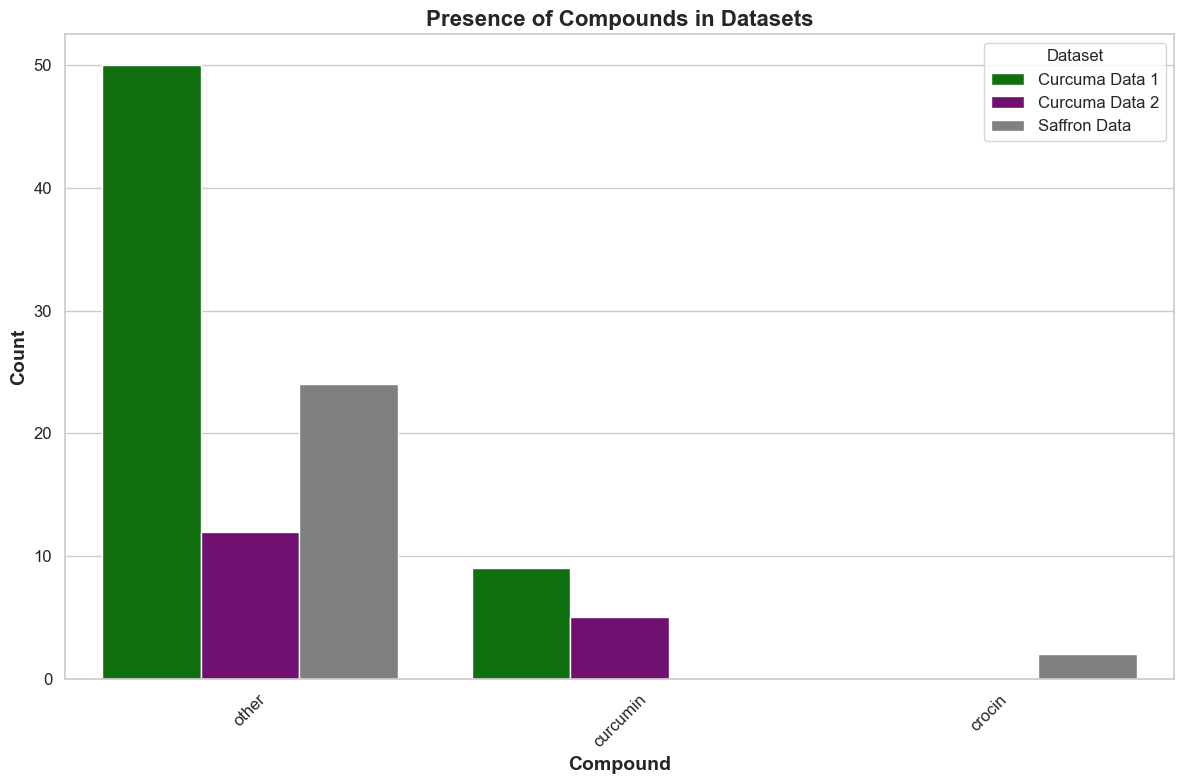

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, compound_name, dataset_name):
    data['compound_presence'] = data['metabolite_identification'].apply(lambda x: compound_name if compound_name in str(x).lower() else 'other')
    compound_counts = data['compound_presence'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'curcumin', 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'curcumin', 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'crocin', 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Define a custom color palette with enough colors
custom_palette = ['green', 'purple', 'grey']

# Plotting
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=all_compounds, x='compound', y='count', hue='dataset', palette=custom_palette)
plt.title('Presence of Compounds in Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Compound', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Dataset', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('compound_presence_datasets_grouped.jpg', format='jpeg', dpi=300)
plt.show()


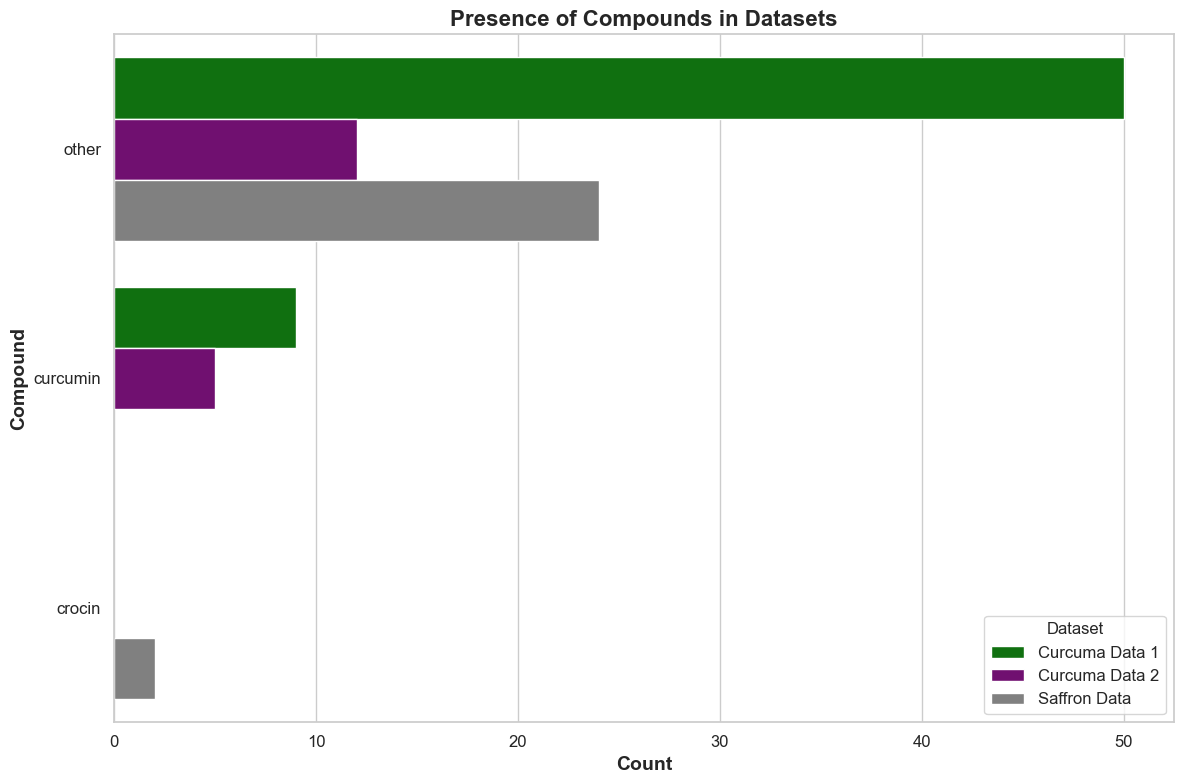

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, compound_name, dataset_name):
    data['compound_presence'] = data['metabolite_identification'].apply(lambda x: compound_name if compound_name in str(x).lower() else 'other')
    compound_counts = data['compound_presence'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'curcumin', 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'curcumin', 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'crocin', 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Define a custom color palette with enough colors
custom_palette = ['green', 'purple', 'grey']

# Plotting
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=all_compounds, y='compound', x='count', hue='dataset', palette=custom_palette, orient='h')
plt.title('Presence of Compounds in Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Compound', fontsize=14, fontweight='bold')
plt.legend(title='Dataset', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('compound_presence_datasets_horizontal.jpg', format='jpeg', dpi=300)
plt.show()
